In [17]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn
rcParams["font.family"] = "arial"
with open("../1_ngs/config.yaml") as f:
    samples = yaml.load(f, Loader=yaml.BaseLoader)["samples"]
    samples.sort()

# 单样品比较

In [12]:
data = dict()
for i in range(len(samples) - 1):
    for j in range(i + 1, len(samples)):
        sample1 = samples[i]
        sample2 = samples[j]
        path = "results/rmats/pairs1/%s_vs_%s/summary.txt" % (sample1, sample2)
        dat = pd.read_csv(path, sep="\t", index_col=0)
        data[(sample1, sample2)] = dat

SE


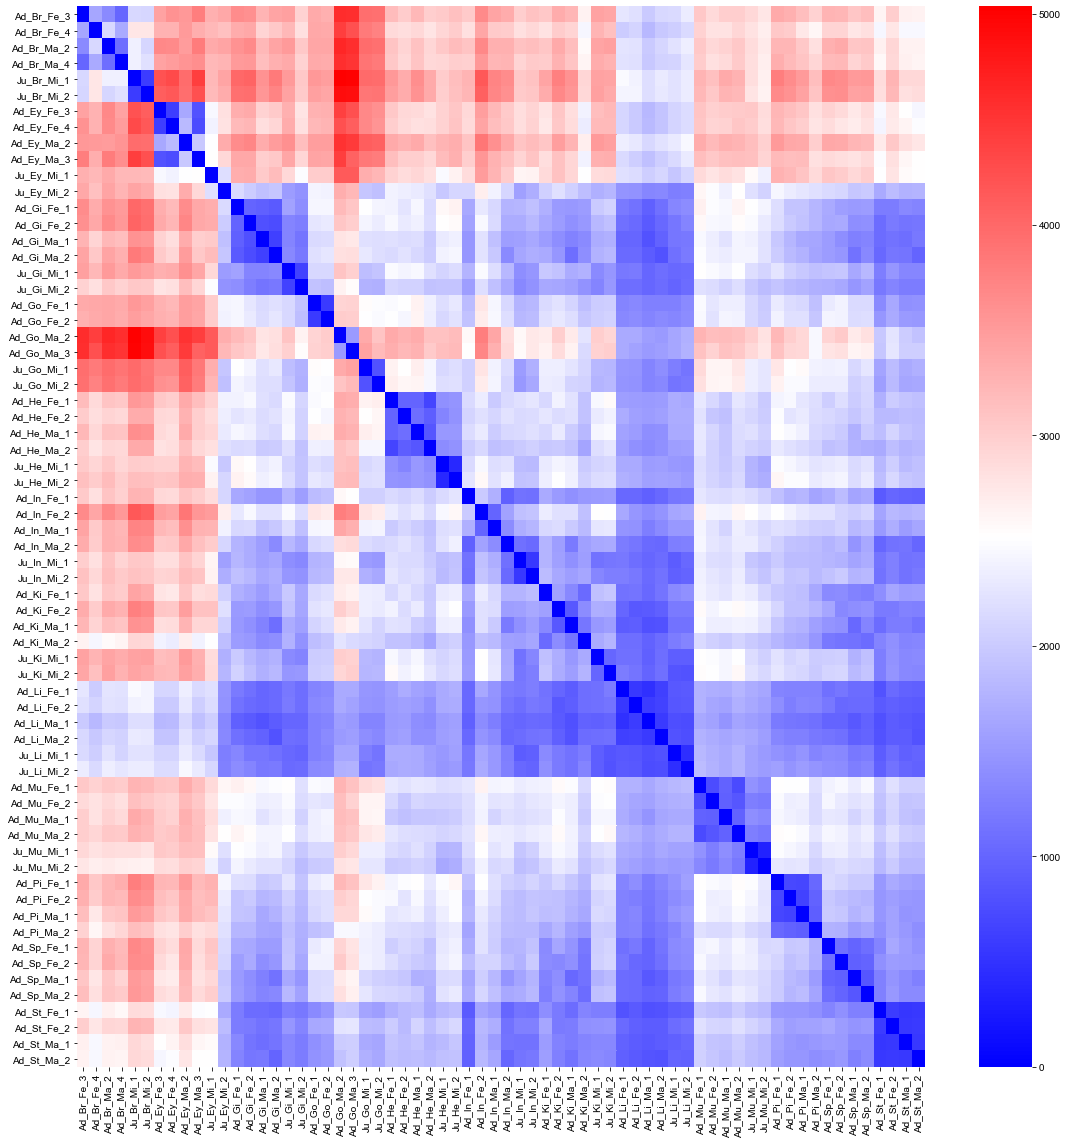

A5SS


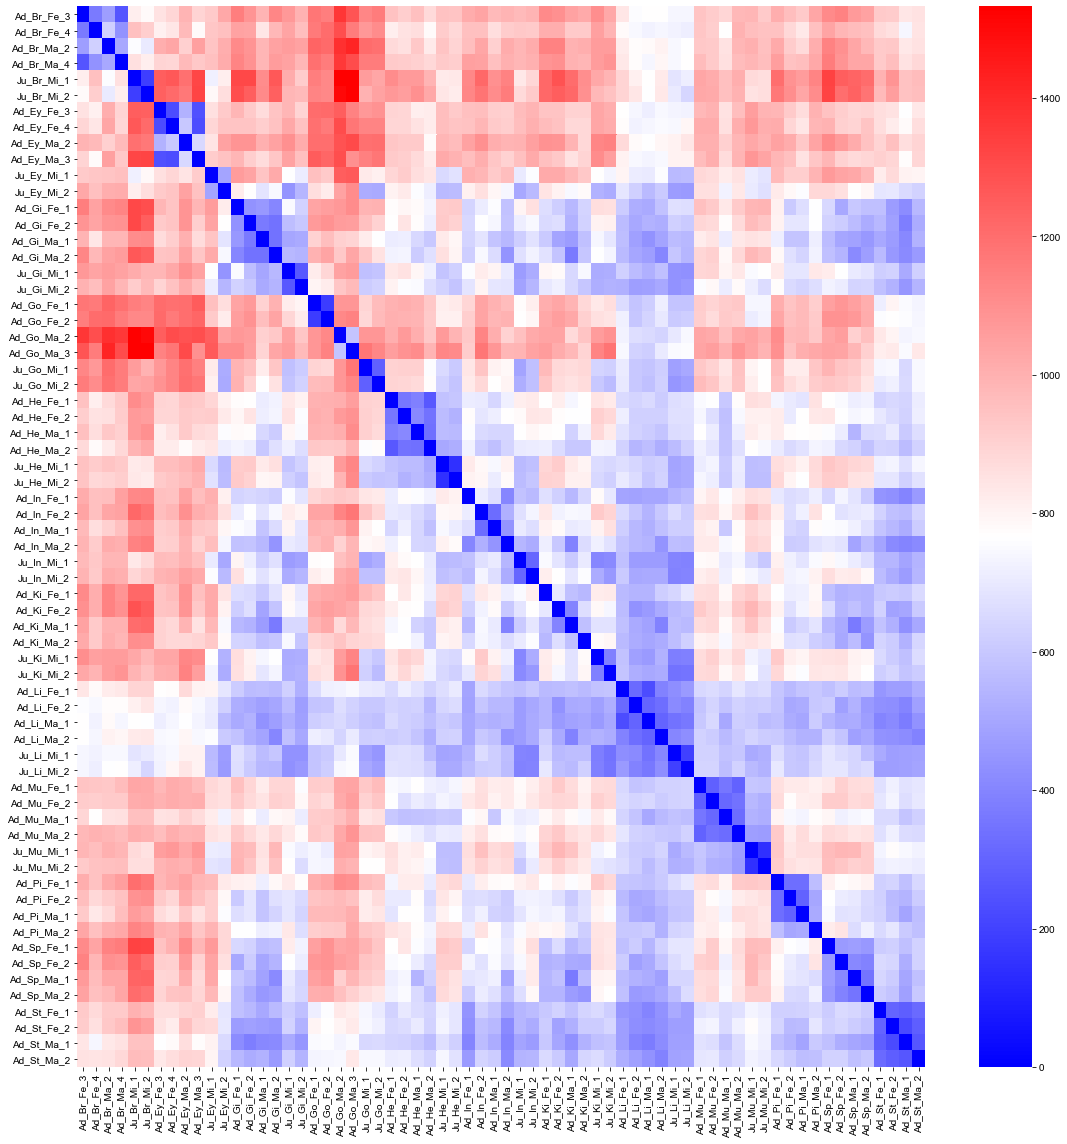

A3SS


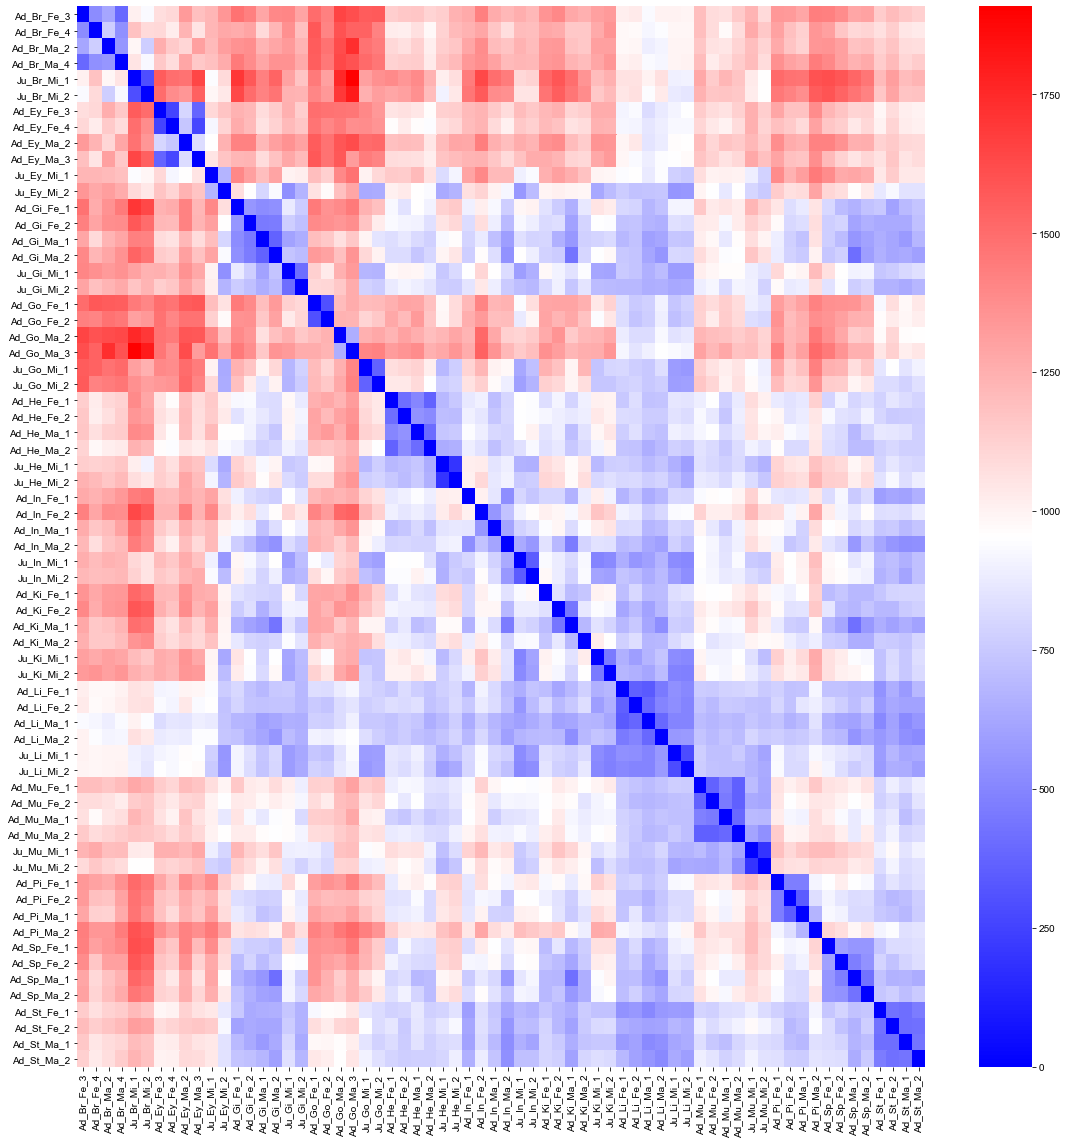

MXE


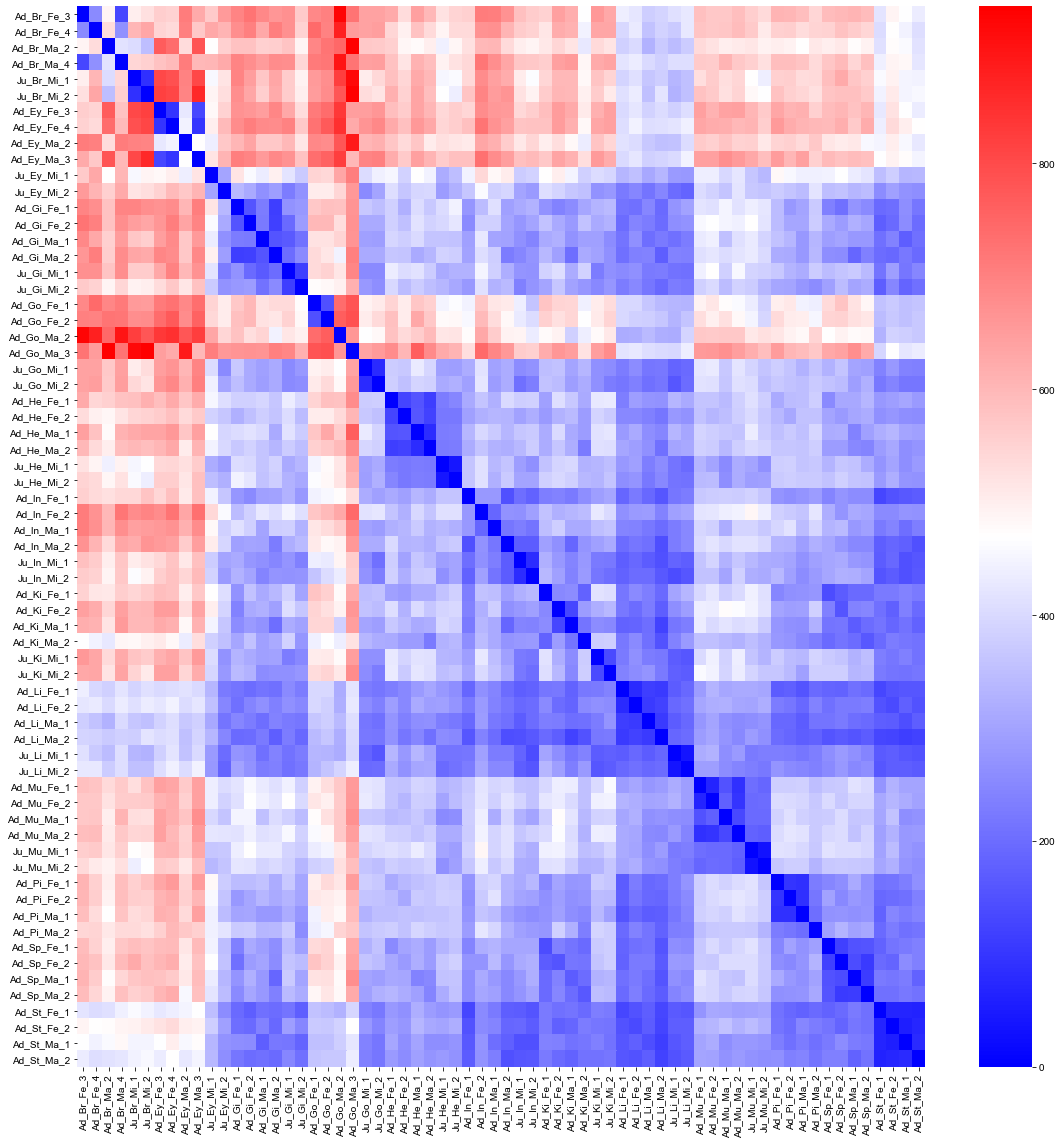

RI


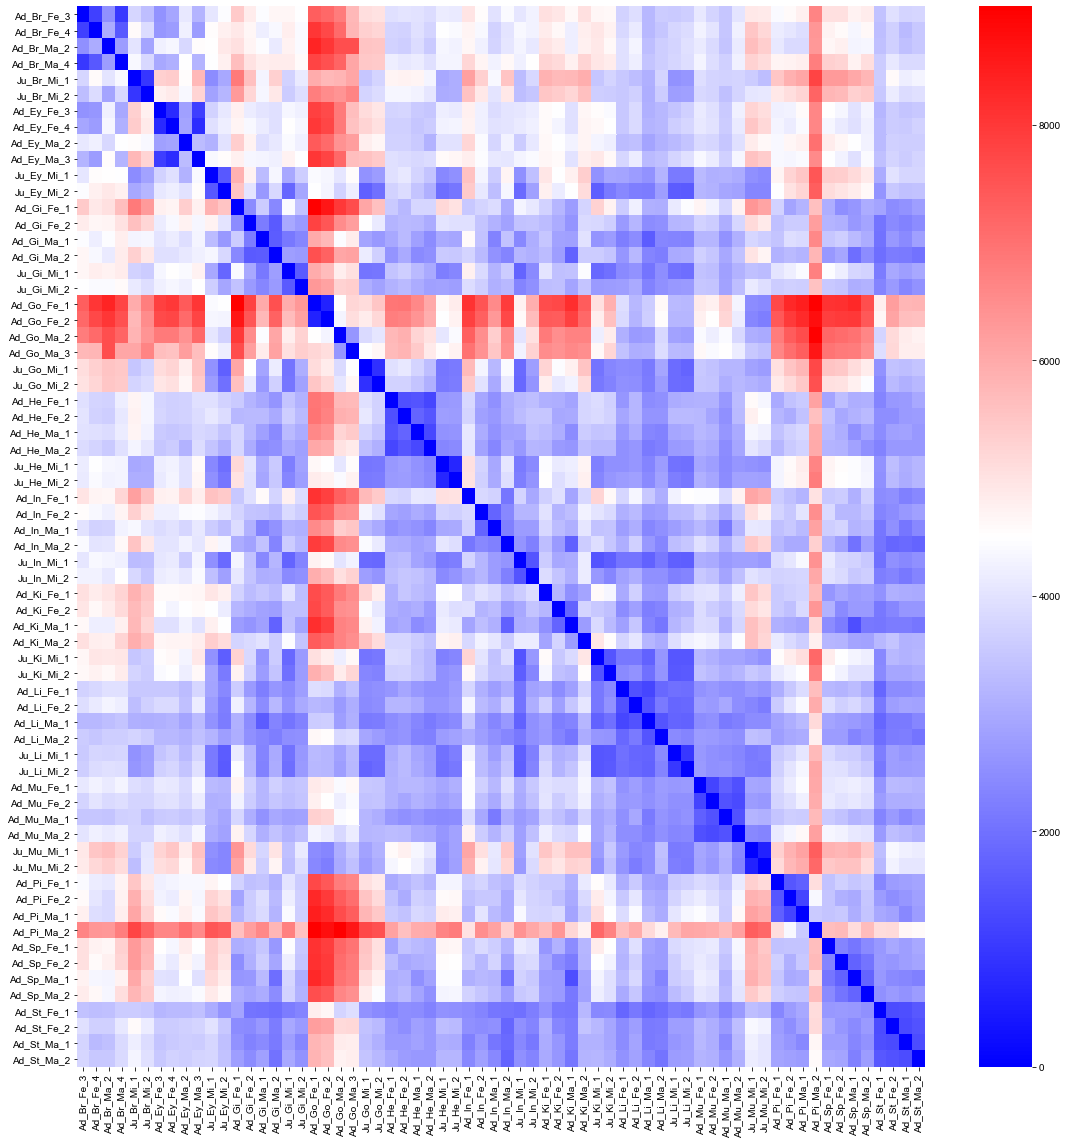

In [33]:
def get_key(item):
    vs = item.split("_")
    return "%s%s%s%s" % (vs[1], vs[0], vs[2], vs[3])

names = ["SE", "A5SS", "A3SS", "MXE", "RI"]
for name in names:
    print(name)
    matrix = np.zeros((len(samples), len(samples)), dtype=np.int)
    for i in range(len(samples) - 1):
        for j in range(i + 1, len(samples)):
            sample1 = samples[i]
            sample2 = samples[j]
            dat = data[(sample1, sample2)]
            value = dat.loc[name]["SignificantEventsJC"]
            matrix[i][j] = value
            matrix[j][i] = value
    matrix = pd.DataFrame(matrix)
    matrix.index = samples
    matrix.columns = samples
    array = list(sorted(samples, key=get_key))
    matrix = matrix.loc[array][array]
    plt.figure(figsize=(16, 16))
    seaborn.heatmap(matrix, cmap="bwr")
    plt.tight_layout()
    plt.show()
    plt.close()

# 双样品比较

In [39]:
pairs = list(sorted(set([s[:-2] for s in samples])))

data = dict()  
for i in range(len(pairs) - 1):
    for j in range(i + 1, len(pairs)):
        pair1 = pairs[i]
        pair2 = pairs[j]
        path = "results/rmats/pairs2/%s_vs_%s/summary.txt" % (pair1, pair2)
        dat = pd.read_csv(path, sep="\t", index_col=0)
        data[(pair1, pair2)] = dat

SE


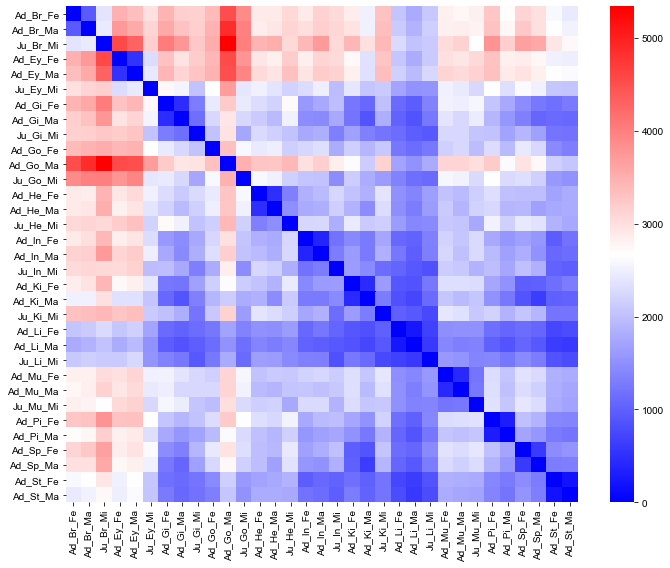

A5SS


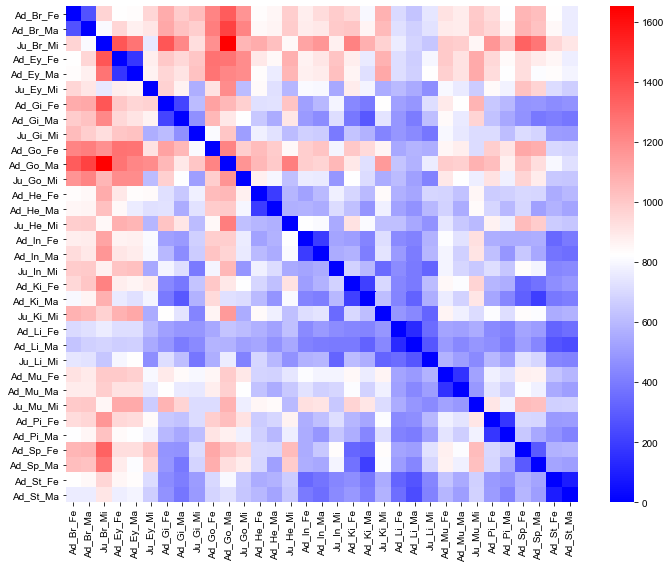

A3SS


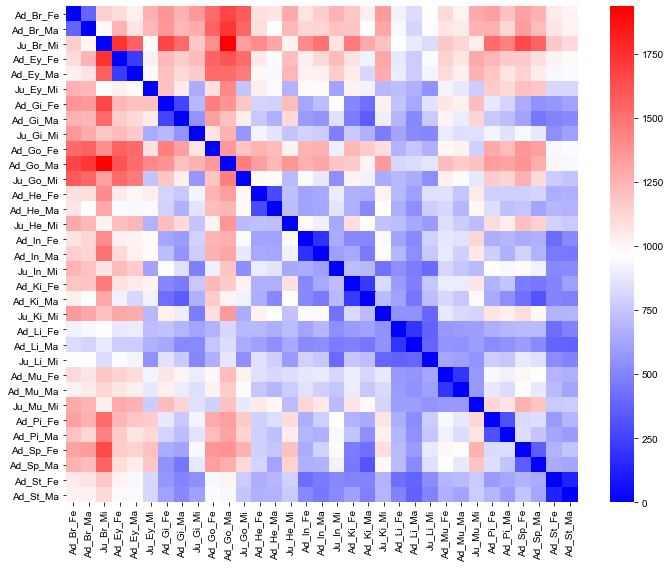

MXE


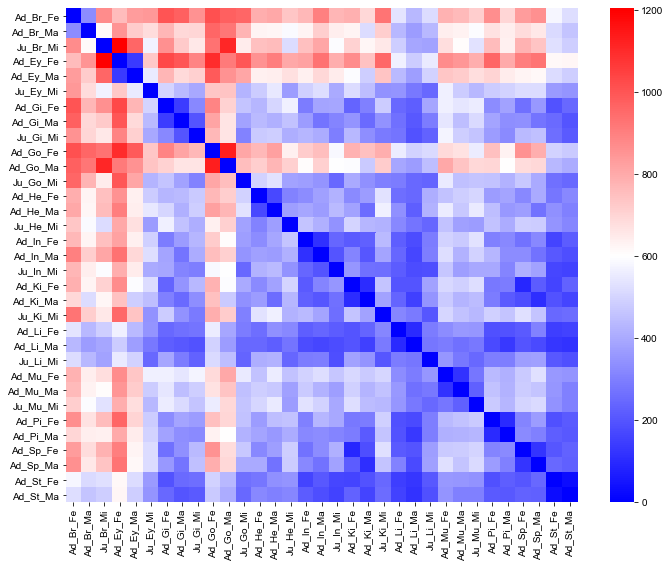

RI


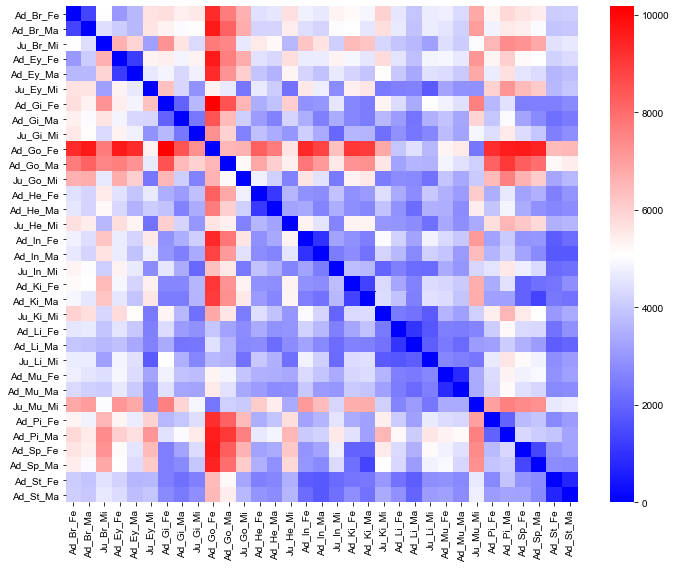

In [43]:
def get_key(item):
    vs = item.split("_")
    return "%s%s%s" % (vs[1], vs[0], vs[2])

names = ["SE", "A5SS", "A3SS", "MXE", "RI"]
for name in names:
    print(name)
    matrix = np.zeros((len(pairs), len(pairs)), dtype=np.int)
    for i in range(len(pairs) - 1):
        for j in range(i + 1, len(pairs)):
            pair1 = pairs[i]
            pair2 = pairs[j]
            dat = data[(pair1, pair2)]
            value = dat.loc[name]["SignificantEventsJC"]
            matrix[i][j] = value
            matrix[j][i] = value
    matrix = pd.DataFrame(matrix)
    matrix.index = pairs
    matrix.columns = pairs
    array = list(sorted(pairs, key=get_key))
    matrix = matrix.loc[array][array]
    
    plt.figure(figsize=(10, 8))
    seaborn.heatmap(matrix, cmap="bwr")
    plt.tight_layout()
    plt.show()
    plt.close()

SE
A5SS
A3SS
MXE
RI


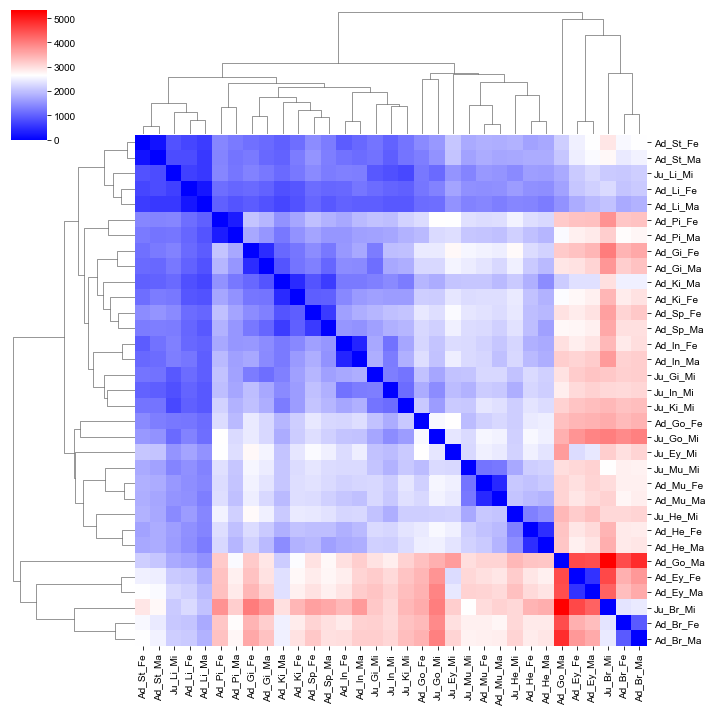

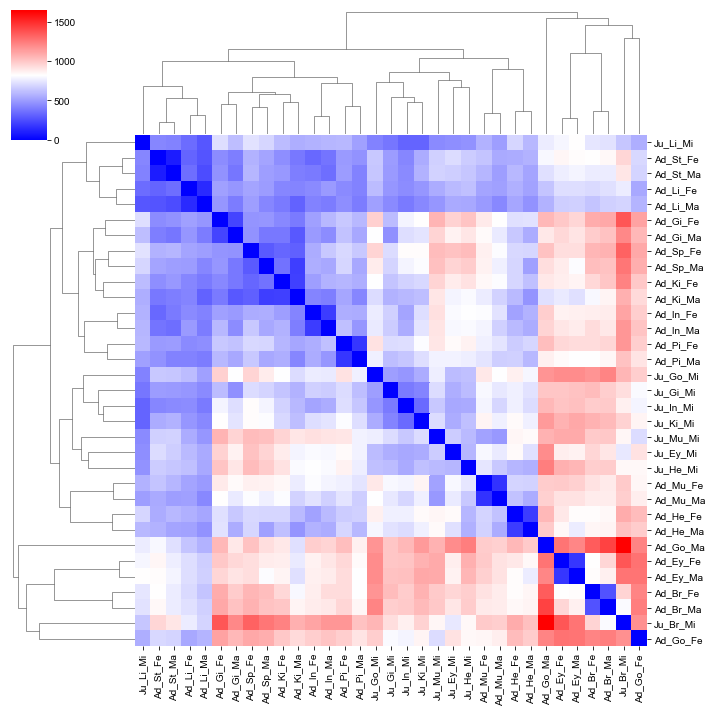

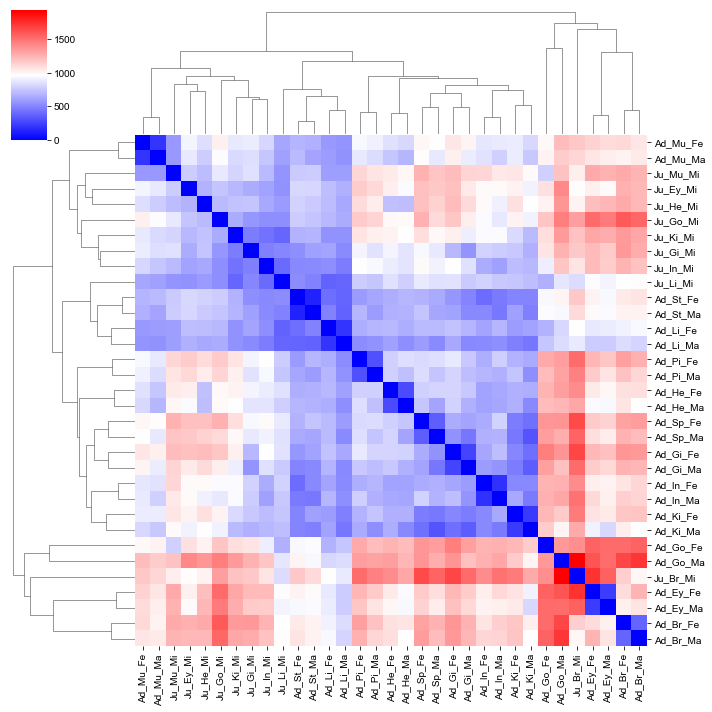

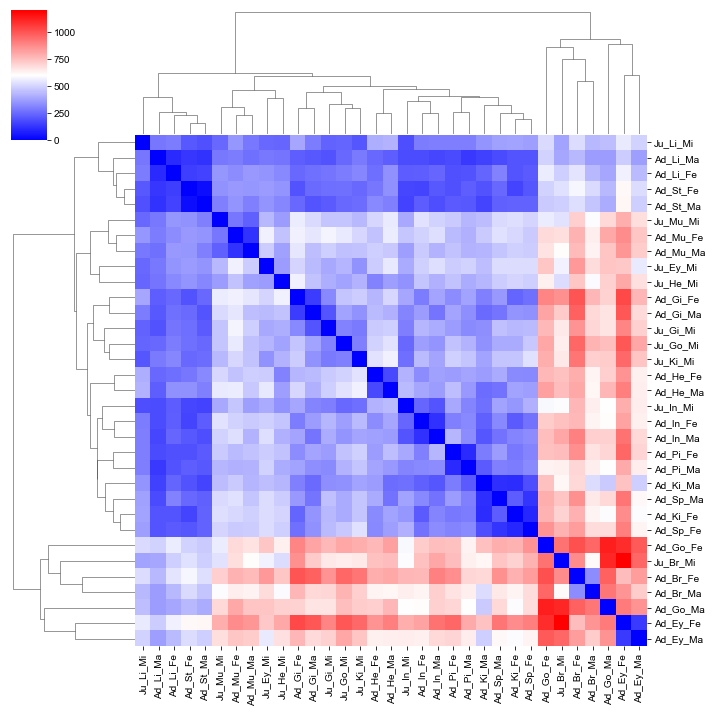

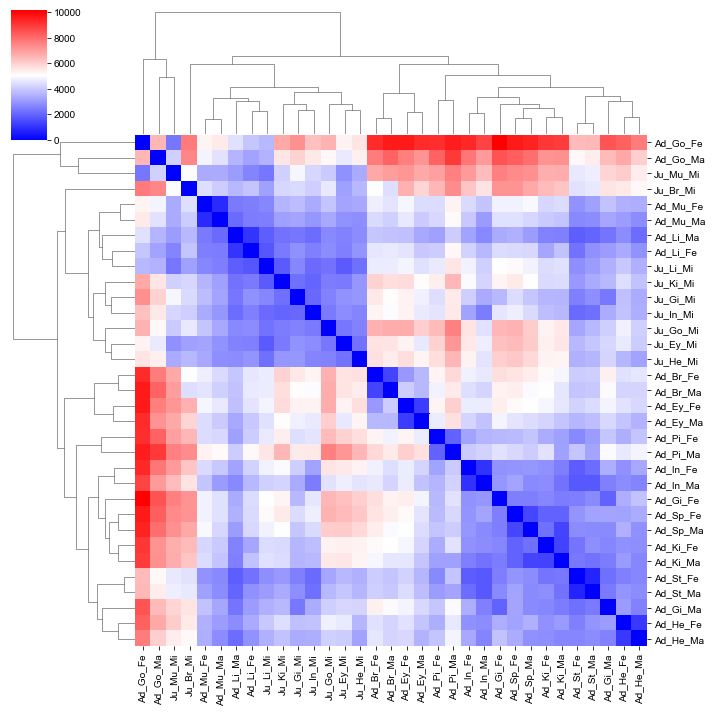

In [46]:
def get_key(item):
    vs = item.split("_")
    return "%s%s%s" % (vs[1], vs[0], vs[2])

names = ["SE", "A5SS", "A3SS", "MXE", "RI"]
for name in names:
    print(name)
    matrix = np.zeros((len(pairs), len(pairs)), dtype=np.int)
    for i in range(len(pairs) - 1):
        for j in range(i + 1, len(pairs)):
            pair1 = pairs[i]
            pair2 = pairs[j]
            dat = data[(pair1, pair2)]
            value = dat.loc[name]["SignificantEventsJC"]
            matrix[i][j] = value
            matrix[j][i] = value
    matrix = pd.DataFrame(matrix)
    matrix.index = pairs
    matrix.columns = pairs
    array = list(sorted(pairs, key=get_key))
    matrix = matrix.loc[array][array]
    
    ret = seaborn.clustermap(matrix, cmap="bwr", figsize=(10, 10))
    ret.fig.show()

# 性腺之间的可变剪接